
# Clustering Human Activity using Inertial Sensors Data


## Note:
* Use the next cell to download the data directly, if that didn't work. you can download it manually (available at [UCI archive](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)) a copy will also be available on Piazza.

* Don't change the part of the code that labels `#Do not change`

* Attach this notebook to your answer sheet with all outputs visible.
* make sure you have  `pytorch, scikit learn, pandas` in your environment


## Imports

In [38]:
import numpy as np

In [39]:

#### Download the dataset

import urllib.request
import zipfile
import os

dataset_url = "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"
zip_file_path = "Dataset.zip"
extracted_downloaded_folder = "Dataset"
extracted_data_folder = "UCI HAR Dataset"

if not os.path.exists(zip_file_path):
    print("Downloading the dataset...")
    urllib.request.urlretrieve(dataset_url, zip_file_path)

if not os.path.exists(extracted_downloaded_folder):
    print("Extracting the dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(".")

if not os.path.exists(extracted_data_folder):
    print("Extracting the dataset...")
    with zipfile.ZipFile(extracted_data_folder +'.zip', 'r') as zip_ref:
        zip_ref.extractall(".")

print("Dataset is ready.")


Extracting the dataset...
Dataset is ready.


### Load the data into a dataframe

The X_train dataframe contains all extracted features from the smartphone dataset - 561 features for each of the 30 individuals single activity

The Y_train contains the labels of each rows - of all this 561 single features, this is the activity they were performing


In [40]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Define paths to data files
train_path = "UCI HAR Dataset/train/"
test_path = "UCI HAR Dataset/test/"
activity_mapper_path = "UCI HAR Dataset/activity_labels.txt"


# Load training and testing data
X_train, y_train  = pd.read_csv(train_path + "X_train.txt", delim_whitespace=True, header=None), pd.read_csv(train_path + "y_train.txt", delim_whitespace=True, header=None)
X_test, y_test  = pd.read_csv(test_path + "X_test.txt", delim_whitespace=True, header=None), pd.read_csv(test_path + "y_test.txt", delim_whitespace=True, header=None)

# Display the first 5 rows of the training dataframe
print("First 5 rows of training feature dataframe:")
X_train.head()  # DO NOT CHANGE


First 5 rows of training feature dataframe:


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


#### scaling the data and PCA

In [41]:
from sklearn.preprocessing import StandardScaler

# TODO: Scale X_train
scaler = StandardScaler()

# Scale X_train
X_train_scaled = scaler.fit_transform(X_train)

# Scale X_test
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Add 'Activity' column to create training_df and testing_df
# TODO: Combine X_train and y_train into a single DataFrame named training_df.
training_df =  pd.concat([X_train, y_train], axis=1)

# TODO: Combine X_test and y_test into a single DataFrame named testing_df.
testing_df = pd.concat([X_test, y_test], axis=1)



# Display the first 5 rows of the training feature dataframe
print("First 5 rows of training feature dataframe:")
training_df.head()  # DO NOT CHANGE

First 5 rows of training feature dataframe:


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,0
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,5
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,5
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,5
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,5
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,5


PCA shape:  (7352, 2)
First two principal components: 
[[-16.13854371   2.15202401]
 [-15.2961943    1.38714378]
 [-15.13701861   2.47335094]
 [-15.35088376   3.91568073]
 [-15.54481351   4.59873678]]


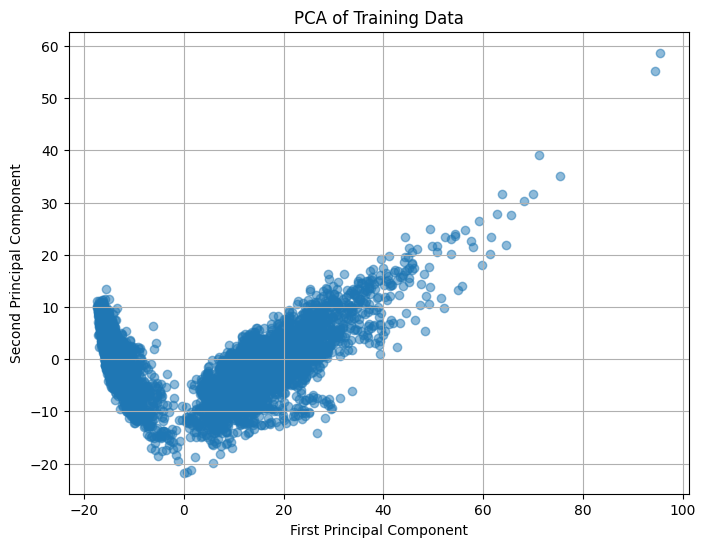

In [42]:
from sklearn.decomposition import PCA
# TODO perform PCA on the train data and get the first 2 PC
pca =  PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
print("PCA shape: ", X_train_pca.shape)  # DO NOT CHANGE
# print the first two principal components
print("First two principal components: ")
print(X_train_pca[:5])  # DO NOT CHANGE
# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.title("PCA of Training Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid()
plt.show()

#### Visualize the data

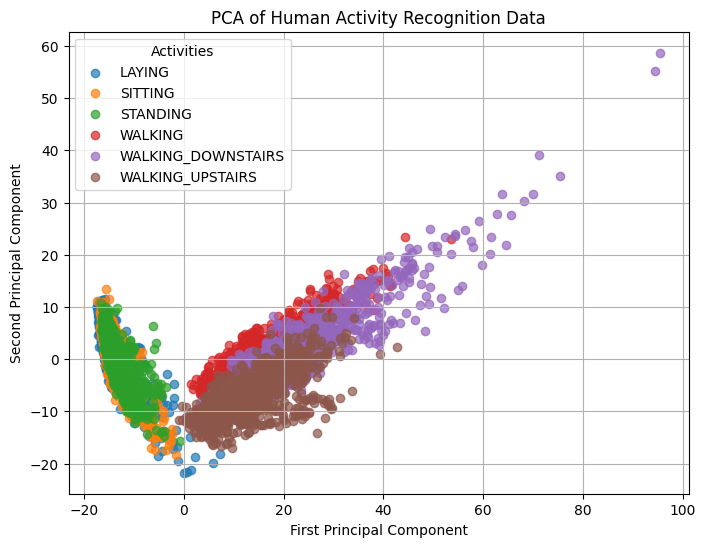

In [43]:
import numpy as np

# Visualize training data using PCA
# Use the feature decoder to create Activity Name column

# Load activity labels
activity_labels = pd.read_csv(activity_mapper_path, header=None, sep=r'\s+', names=['id', 'activity_name'])

# Create mapping dictionary {1: "WALKING", 2: "WALKING_UPSTAIRS", ...}
activity_mapping = dict(zip(activity_labels['id'], activity_labels['activity_name']))

# TODO use the mapping to decode the Activities labels
# Since y_train is a DataFrame, we need to access the values differently
y_values = y_train.iloc[:, 0].values  # Get the first column as values
Activity_Name = np.array([activity_mapping[int(label)] for label in y_values])

# TODO: Create a scatter plot using the X_train_pca and the Activity Names
plt.figure(figsize=(8, 6))

# Create scatter plot with different colors for each activity
unique_activities = np.unique(Activity_Name)
for activity in unique_activities:
    indices = np.where(Activity_Name == activity)[0]
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], 
                label=activity, alpha=0.7)

plt.title("PCA of Human Activity Recognition Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title="Activities")
plt.grid(True)
plt.savefig("PCA_activities.png", dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# Print the unique values in y_train
print("Unique values in y_train:", np.unique(y_train))

# Print the activity mapping to see what keys are available
print("Keys in activity_mapping:", list(activity_mapping.keys()))

# Print some sample values to understand their format
print("Sample y_train values:", y_train[:5])
print("Sample y_train type:", type(y_train), "element type:", type(y_train[0]))

# Check if any values in y_train are not in the mapping
missing_keys = []
for label in np.unique(y_train):
    if label not in activity_mapping:
        missing_keys.append(label)
        
print("Labels not found in mapping:", missing_keys)

Unique values in y_train: [1 2 3 4 5 6]
Keys in activity_mapping: [1, 2, 3, 4, 5, 6]
Sample y_train values:    0
0  5
1  5
2  5
3  5
4  5
Sample y_train type: <class 'pandas.core.frame.DataFrame'> element type: <class 'pandas.core.series.Series'>
Labels not found in mapping: []


## Kmeans Clustering and The Optimal Number of Clusters

#### 1.  **Elbow Method**

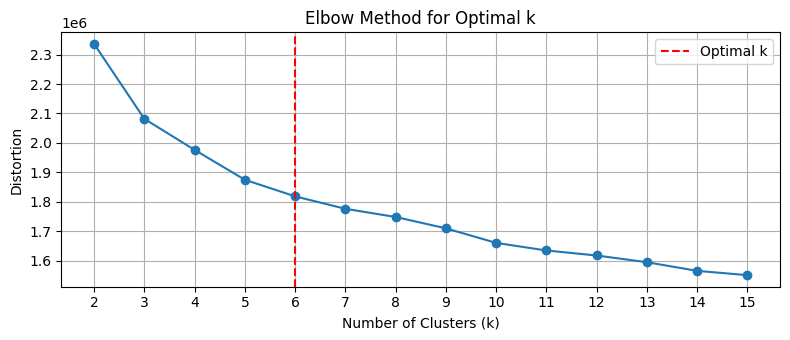

In [45]:
from sklearn.cluster import KMeans
# Elbow Method
distortion_values = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    distortion = kmeans.inertia_
    distortion_values.append(distortion)



# Plotting the Elbow Method
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 16), distortion_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.xticks(range(2, 16))
plt.grid()
plt.axvline(x=6, color='r', linestyle='--', label='Optimal k')
plt.legend()    
plt.tight_layout()
plt.show()

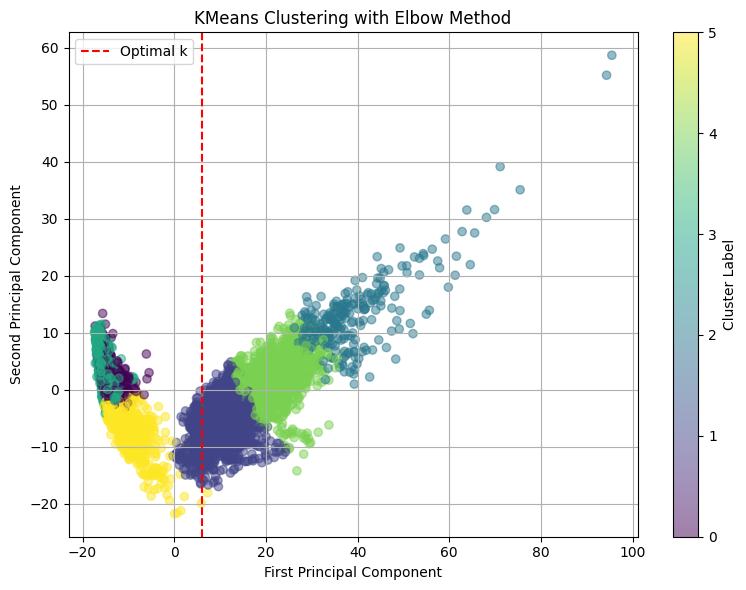

In [46]:
# Choose k based on the elbow method
elbow_k = 6
kmeans_elbow = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
clusters_elbow = kmeans_elbow.fit_predict(X_train)

# TODO: PCA for visualization
pca =  PCA(n_components=2)
X_train_pca_elbow = pca.fit_transform(X_train)


# Plotting the clusters
plt.figure(figsize=(8, 6))
# TODO <--code below-->
plt.scatter(X_train_pca_elbow[:, 0], X_train_pca_elbow[:, 1], c=clusters_elbow, cmap='viridis', alpha=0.5)
plt.title("KMeans Clustering with Elbow Method")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.axvline(x=6, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.tight_layout()


plt.show()



### Observing Distortion with Increasing k

The distortion, which measures the sum of squared distances between data points and their assigned cluster centroids, decreases as the number of clusters (k) increases. This is because adding more clusters allows the centroids to better fit the data, reducing the distance between points and their nearest centroid. However, the rate of decrease in distortion diminishes as k becomes larger, leading to the "elbow" point, where adding more clusters provides diminishing returns in reducing distortion.



#### 2.  Adjusted Rand Index (ARI)

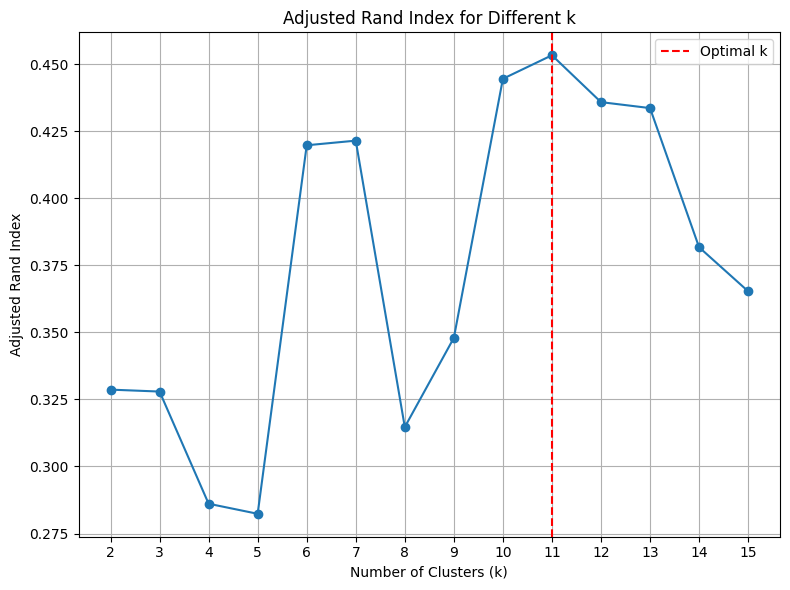

In [47]:
from sklearn.metrics import adjusted_rand_score
# 2. Adjusted Rand Index (ARI)
ari_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_train_scaled)
    ari = adjusted_rand_score(y_train.values.ravel(), clusters)
    ari_scores.append(ari)


# Plotting ARI Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), ari_scores, marker='o')
plt.title("Adjusted Rand Index for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Adjusted Rand Index")
plt.xticks(range(2, 16))
plt.grid()
plt.axvline(x=11, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.tight_layout()
plt.show()



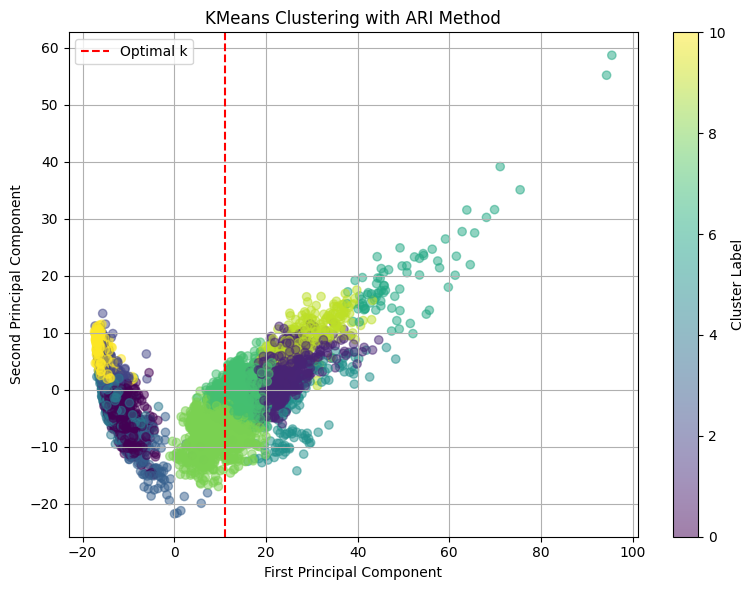

In [48]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
# Choose k based on ARI
best_ari_k = 11
kmeans_ari = KMeans(n_clusters=best_ari_k, random_state=42, n_init=10)
clusters_ari = kmeans_ari.fit_predict(X_train)

# PCA for visualization
pca =  PCA(n_components=2)
X_train_pca_ari =  pca.fit_transform(X_train)


# Plotting the clusters
plt.figure(figsize=(8, 6))
# TODO <--code below-->
plt.scatter(X_train_pca_ari[:, 0], X_train_pca_ari[:, 1], c=clusters_ari, cmap='viridis', alpha=0.5)
plt.title("KMeans Clustering with ARI Method")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.axvline(x=11, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.tight_layout()

plt.show()




### Adjusted Rand Index (ARI) Analysis with Increasing k

The Adjusted Rand Index (ARI) measures the similarity between the clustering results and the ground truth labels. As the number of clusters (k) increases, the ARI values exhibit the following behavior:

1. **Fluctuations**: As k increases, the ARI fluctuates due to overfitting or the creation of clusters that do not correspond well to the actual data distribution.

2. **Optimal k**: The ARI reaches its peak at an optimal value of k, where the clustering best matches the ground truth labels. In this case, the optimal k is observed at `k = 11`, where the ARI achieves its maximum value of approximately `0.4533`.

3. **Decline or Plateau**: Beyond the optimal k, the ARI declines or plateau as the clustering becomes too granular, leading to over-segmentation and reduced alignment with the ground truth.




## Prototype Selection using K-means Clustering.

### 1. Random Selection

In [54]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


def random_prototype_selection(X, y, n_samples):
    """
    Selects a random subset from the data. train a logistic regression model
    on the selected data.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target labels.
        n_samples(int): The number of samples to select from each class.

    Returns:
        tuple: A tuple containing the selected features (X_selected) and labels (y_selected).
    """


    # Step 1: Initialize lists to store selected features and labels
    X_selected = []
    y_selected = []

    # Step 2: Iterate over each unique class label in the target labels
    for label in np.unique(y.values.ravel()):
        # Filter the data for the current class
        X_class = X[y.values.ravel() == label]
        y_class = y[y.values.ravel() == label]

        # Randomly select n_samples data points from the current class
        indices = np.random.choice(len(X_class), n_samples, replace=False)
        X_selected.append(X_class.iloc[indices])
        y_selected.append(y_class.iloc[indices])

    # Step 3: Concatenate the selected data points from all classes
    X_selected = pd.concat(X_selected, axis=0)
    y_selected = pd.concat(y_selected, axis=0)



    return X_selected, y_selected


n_repetitions = 10
accuracies = []
n_samples = 120

# TODO caculate the accracy for the randomly selected prototype for 10 expermenteds
# TODO <--code below-->
for _ in range(n_repetitions):
    # Select prototypes
    X_selected, y_selected = random_prototype_selection(X_train, y_train, n_samples)

    # Train Logistic Regression model
    logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
    logistic_regression.fit(X_selected, y_selected)

    # Make predictions and calculate accuracy
    y_pred = logistic_regression.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy with Random Selection over {n_repetitions} repetitions: {average_accuracy:.4f}")


Average Accuracy with Random Selection over 10 repetitions: 0.9233


### 2. K-means Clustering by Class


In [55]:

# 2. K-means Clustering by Class
def kmeans_prototype_selection(X, y, n_prototypes_per_class):
    """
    Selects prototypes using K-means clustering for each class.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target labels.
        n_prototypes_per_class (int): The number of prototypes to select from each class.

    Returns:
        pd.DataFrame: The selected prototypes.
        pd.Series: The selected labels.
    """

    #Initialize lists to store selected prototypes and labels
    X_selected = []  # List to store selected feature subsets for each class
    y_selected = []  # List to store selected labels for each class


    # TODO:
      # Step 1: Iterate over each unique class label in the target labels
      
      # Step 2: for each class cluster its points using k = n_prototypes_per_class
      # Step 3: Find the closest points to each centroid
    # TODO <--code below-->
    for label in np.unique(y.values.ravel()):
        # Step 1: Filter the data for the current class
        X_class = X[y.values.ravel() == label]
        y_class = y[y.values.ravel() == label]

        # Step 2: Apply K-means clustering to the current class
        kmeans = KMeans(n_clusters=n_prototypes_per_class, random_state=42)
        kmeans.fit(X_class)

        # Step 3: Find the closest points to each centroid
        centroids = kmeans.cluster_centers_
        closest_indices = []
        for centroid in centroids:
            distances = np.linalg.norm(X_class - centroid, axis=1)
            closest_index = np.argmin(distances)
            closest_indices.append(closest_index)

        # Append the selected prototypes and their corresponding labels
        X_selected.append(X_class.iloc[closest_indices])
        y_selected.append(y_class.iloc[closest_indices])
    # Step 4: Concatenate the selected prototypes from all classes
    X_selected = pd.concat(X_selected, axis=0)
    y_selected = pd.concat(y_selected, axis=0)
    # Step 5: Return the selected prototypes and labels
    return X_selected, y_selected




# Select prototypes using K-means
X_train_selected_kmeans, y_train_selected_kmeans = kmeans_prototype_selection(X_train, y_train[0], 20)

# Train Logistic Regression model
logistic_regression_kmeans = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_kmeans.fit(X_train_selected_kmeans, y_train_selected_kmeans)

# Make predictions and calculate accuracy
y_pred_kmeans = logistic_regression_kmeans.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print(f"Accuracy with K-means Selection: {accuracy_kmeans:.4f}")



Accuracy with K-means Selection: 0.9057


### Comparison of Model Accuracy with Random Selection vs. K-means Clustering for Prototype Selection

The accuracy of the model trained using **random prototype selection** is `average_accuracy = 0.9268`, while the accuracy of the model trained using **K-means clustering for prototype selection** is `accuracy_kmeans = 0.9057`.

#### Observations:
1. **Random Prototype Selection**:
    - Achieved a higher average accuracy of `92.68%`.
    - This method relies on randomly selecting prototypes, which may capture diverse samples from each class.

2. **K-means Clustering for Prototype Selection**:
    - Achieved a slightly lower accuracy of `90.57%`.
    - This method selects prototypes based on clustering, which ensures that the selected samples are representative of the cluster centroids. However, it may miss some outlier or diverse samples.

Using clustering for prototype selection slightly reduces the model's performance compared to random selection. This could be due to the loss of diversity in the selected prototypes, as clustering focuses on centroids rather than capturing the full variability of the data.


## Autoencoder for Features Learning.


####1.  Data Preparation:

In [61]:
import torch
from torch.utils.data import Dataset, DataLoader

# Create PyTorch Dataset
class SensorsDataset(Dataset):
    def __init__(self, data_dict, labels):
        # Create a list of all sensor data tensors
        sensor_data = []
        for key in sorted(data_dict.keys()):
            # Convert to tensor, shape: [num_samples, 128]
            sensor_data.append(torch.tensor(data_dict[key], dtype=torch.float32))
        
        # Stack along dimension 1 to get shape [num_samples, num_sensors, 128]
        # This transposes the data to have sensors as channels
        self.data = torch.stack(sensor_data, dim=1)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset and dataloader
train_dataset = SensorsDataset(train_data, train_labels)
# Create pytorch dataloader with batch size 32, and shuffle
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Verify shapes
sample, label = next(iter(train_loader))
print(f"Input shape: {sample.shape}")  # Should be (batch_size, 9, 128)
print(f"Label shape: {label.shape}")   # Should be (batch_size)

Input shape: torch.Size([32, 9, 128])
Label shape: torch.Size([32])


In [58]:
import torch
from torch.utils.data import Dataset, DataLoader
# Create PyTorch Dataset
class SensorsDataset(Dataset):
    def __init__(self, data_dict, labels):
        # Stack all signals along the feature dimension  Shape: (num_samples, 128, num_features)
        self.data = torch.stack([torch.tensor(data_dict[key]) for key in sorted(data_dict.keys())], dim=1)
        self.labels =  torch.tensor(labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset and dataloader
train_dataset = SensorsDataset(train_data, train_labels)
# TODO: create pytorch dataloader with Batch sie 32, and shuffle
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Verify shapes
sample, label = next(iter(train_loader))
print(f"Input shape: {sample.shape}")  # Should be (batch_size, 128, 9)
print(f"Label shape: {label.shape}")   # Should be (batch_size)


Input shape: torch.Size([32, 9, 128])
Label shape: torch.Size([32])



#### 2. Autoencoder Implementation

Epoch 1/10, Loss: 0.0607
Epoch 2/10, Loss: 0.0518
Epoch 3/10, Loss: 0.0498
Epoch 4/10, Loss: 0.0481
Epoch 5/10, Loss: 0.0468
Epoch 6/10, Loss: 0.0449
Epoch 7/10, Loss: 0.0425
Epoch 8/10, Loss: 0.0409
Epoch 9/10, Loss: 0.0396
Epoch 10/10, Loss: 0.0376


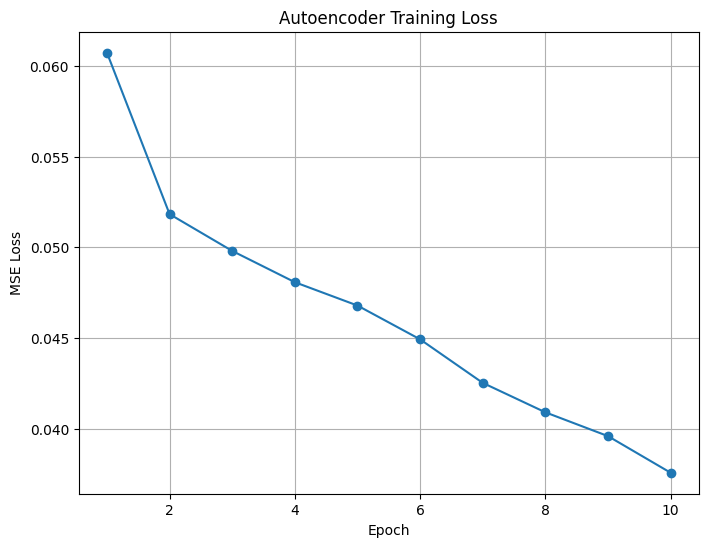

In [63]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class TimeSeriesAE(nn.Module):
    def __init__(self, input_size=9, seq_length=128, hidden_size=64, encoding_dim=64):
        super().__init__()
        
        # Transpose the input before feeding to GRU
        self.input_size = input_size
        self.seq_length = seq_length
        
        # Encoder
        self.encoder = nn.GRU(input_size=input_size, 
                             hidden_size=hidden_size, 
                             batch_first=True, 
                             bidirectional=True)
        self.enc_fc = nn.Linear(hidden_size * 2, encoding_dim)  # *2 for bidirectional

        # Decoder
        self.dec_fc = nn.Linear(encoding_dim, hidden_size)
        self.decoder = nn.GRU(input_size=hidden_size, 
                              hidden_size=hidden_size, 
                              batch_first=True, 
                              bidirectional=True)
        self.output_layer = nn.Linear(hidden_size * 2, input_size)  # Output matches input features

    def forward(self, x):
        # x shape: [batch_size, num_features, seq_length]
        # Need to transpose to [batch_size, seq_length, num_features]
        x = x.transpose(1, 2)
        
        # Encoding
        _, hidden = self.encoder(x)
        hidden = torch.cat([hidden[-2], hidden[-1]], dim=1)  # Combine bidirectional
        encoded = self.enc_fc(hidden)

        # Decoding
        decoded = self.dec_fc(encoded).unsqueeze(1).repeat(1, x.size(1), 1)
        out, _ = self.decoder(decoded)
        reconstructed = self.output_layer(out)
        
        # Transpose back to original format [batch_size, num_features, seq_length]
        reconstructed = reconstructed.transpose(1, 2)

        return reconstructed, encoded

# Instantiate the model
input_size = 9  # Number of features
seq_length = 128  # Time steps
hidden_size = 64
encoding_dim = 64

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimeSeriesAE(input_size=input_size, seq_length=seq_length, hidden_size=hidden_size, encoding_dim=encoding_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train loop for the autoencoder
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for batch_X, _ in train_loader:
        # Move batch to device
        batch_X = batch_X.to(device)
        
        # Forward pass
        reconstructed, _ = model(batch_X)
        loss = criterion(reconstructed, batch_X)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Calculate average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plotting the loss vs epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), loss_history, marker='o')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.savefig('autoencoder_training_loss.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

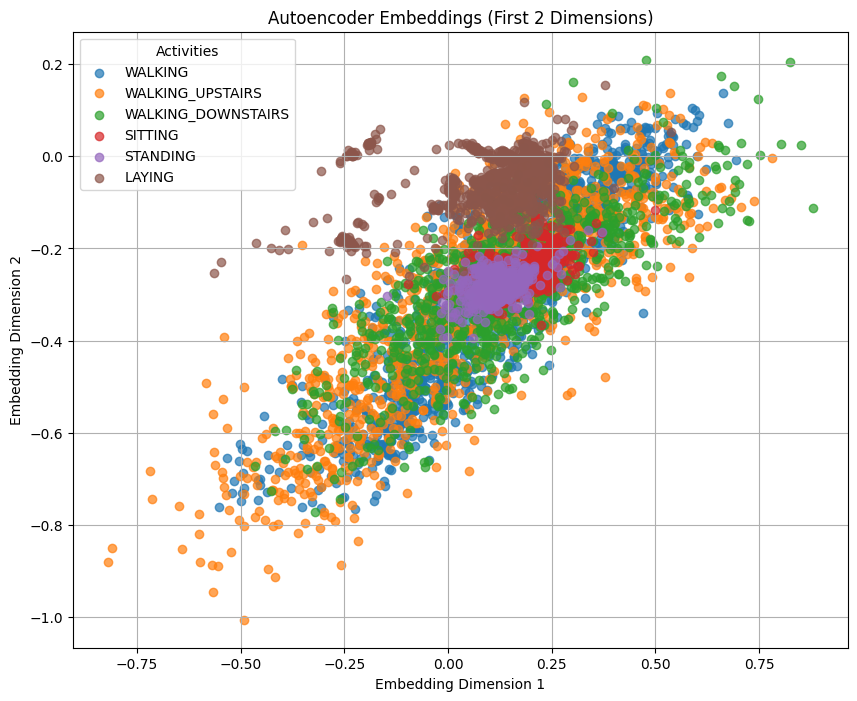

In [65]:
# 3. Embedding Extraction and Visualization
import numpy as np

ae_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

# Extract embeddings for the training data
model.eval()
embeddings = []
labels_list = []

with torch.no_grad():
    for batch_X, batch_y in ae_loader:
        # Move batch to device
        batch_X = batch_X.to(device)
        
        # Pass through the model to get embeddings
        _, encoded = model(batch_X)
        
        # Move embeddings to CPU and convert to numpy
        embeddings.append(encoded.cpu().numpy())
        labels_list.append(batch_y.numpy())

# Concatenate all batches
embeddings = np.concatenate(embeddings, axis=0)
labels = np.concatenate(labels_list, axis=0)

# Create a scatter plot of the 2D embeddings (first 2 dimensions)
plt.figure(figsize=(10, 8))

# Load activity labels for better visualization
activity_labels = pd.read_csv("UCI HAR Dataset/activity_labels.txt", 
                              header=None, sep=r'\s+', 
                              names=['id', 'activity_name'])
activity_mapping = dict(zip(activity_labels['id'], activity_labels['activity_name']))

# Create scatter plot with different colors for each activity
unique_activities = np.unique(labels)
for activity in unique_activities:
    indices = np.where(labels == activity)[0]
    plt.scatter(embeddings[indices, 0], embeddings[indices, 1], 
                label=activity_mapping[activity], alpha=0.7)

plt.title("Autoencoder Embeddings (First 2 Dimensions)")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.legend(title="Activities")
plt.grid(True)
plt.savefig('autoencoder_embeddings.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

Number of clusters: 2, ARI: 0.1658
Number of clusters: 3, ARI: 0.2355
Number of clusters: 4, ARI: 0.3309
Number of clusters: 5, ARI: 0.2641
Number of clusters: 6, ARI: 0.3131
Number of clusters: 7, ARI: 0.3236
Number of clusters: 8, ARI: 0.3196
Number of clusters: 9, ARI: 0.3271
Number of clusters: 10, ARI: 0.3508
Number of clusters: 11, ARI: 0.3024
Number of clusters: 12, ARI: 0.2977
Number of clusters: 13, ARI: 0.3138
Number of clusters: 14, ARI: 0.2899
Number of clusters: 15, ARI: 0.2876
Best number of clusters: 10 with ARI: 0.3508


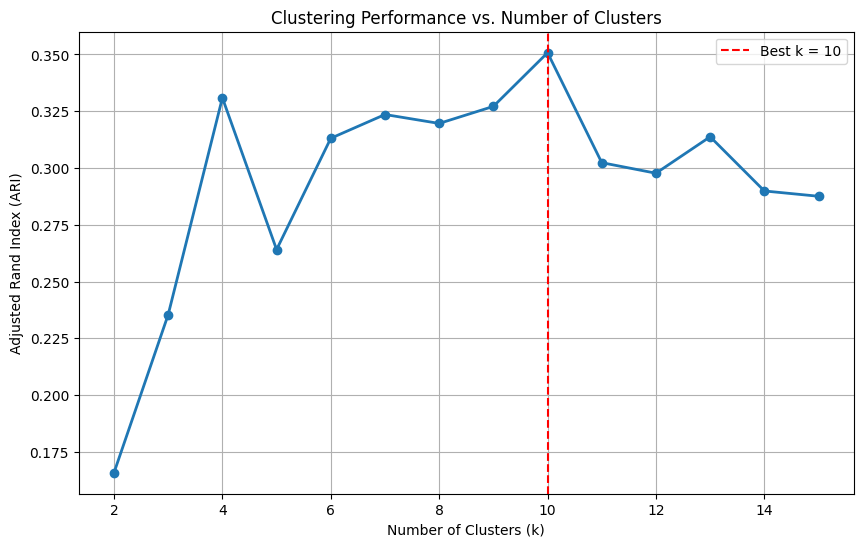

Final ARI with 10 clusters: 0.3508


In [66]:
# Adjusted Rand Index (ARI) for the embeddings
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

ari_scores = []
for k in range(2, 16):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Calculate ARI
    ari = adjusted_rand_score(labels, cluster_labels)
    ari_scores.append(ari)
    print(f"Number of clusters: {k}, ARI: {ari:.4f}")

# Find the best k
best_k = np.argmax(ari_scores) + 2  # +2 because we started from k=2
print(f"Best number of clusters: {best_k} with ARI: {ari_scores[best_k-2]:.4f}")

# Plotting ARI Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), ari_scores, marker='o', linestyle='-', linewidth=2)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.grid(True)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Clustering Performance vs. Number of Clusters')
plt.legend()
plt.savefig('ari_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Perform clustering with the best k
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_cluster_labels = best_kmeans.fit_predict(embeddings)

# Get the final ARI score
final_ari = adjusted_rand_score(labels, best_cluster_labels)
print(f"Final ARI with {best_k} clusters: {final_ari:.4f}")

# Compare with previous ARI from hand-engineered features
# Assuming you have a previous ARI score from part 4.2
# print(f"Previous ARI from hand-engineered features: {previous_ari:.4f}")
# print(f"Difference: {final_ari - previous_ari:.4f}")


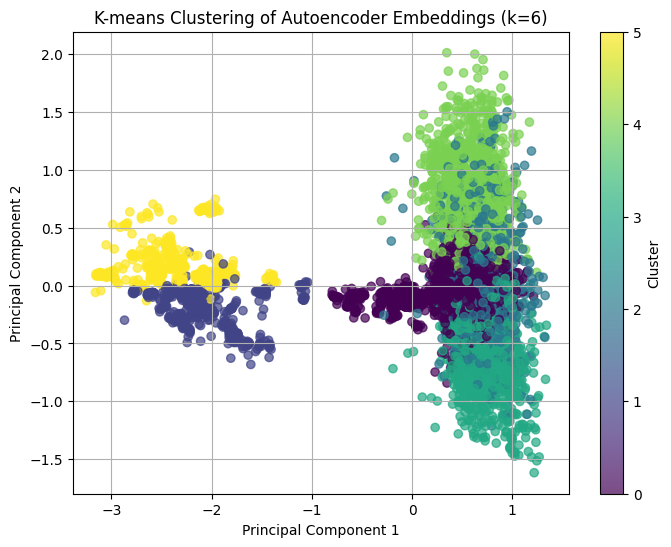

In [67]:
# Choose k based on ARI
best_embedd_ari_k = 6  # Setting to 6 for the 6 activity classes
kmeans_ari = KMeans(n_clusters=best_embedd_ari_k, random_state=42, n_init=10)
clusters_ari = kmeans_ari.fit_predict(embeddings)  # Using the embeddings, not X_train

# PCA for visualization
pca = PCA(n_components=2)
X_train_pca_ari = pca.fit_transform(embeddings)  # Apply PCA to embeddings

# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca_ari[:, 0], X_train_pca_ari[:, 1], 
                     c=clusters_ari, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title(f'K-means Clustering of Autoencoder Embeddings (k={best_embedd_ari_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()